In [8]:
import gensim
import numpy
import utils
import matplotlib.pyplot as plt 
lst1=['אבי','הי"ו','הצעיר','הראשונים','הרה"ג','ואביו','והנ"י','ז"ל','זי"ע','זיע"א','זלה"ה','זללה"ה','זצ"ל','זצוק"ל','זקני','יצ"ו','כמה"ר','כמוה"ר','מהר"ר','מו"ר','נ"י','נ"ר','נר"ו','סילט"א','ע"ה','שליט"א','תלמידי']
lst=['נר"ו',
'יצ"ו', 
'זצוק"ל', 
'הי"ו', 
'זלה"ה', 
'שליט"א', 
'נ"י', 
'עט"ר',
'זללה"ה',
'ז"ל',
'מו"ר',
'זי"ע',
'נ"ר',
"ני'",
'ידידי',
'אהובי',
'ידי"נ',
'נ"ע',
'נלב"ע',
'מ"ר',
'שיחיה',
"שיחי'",
'אאמו"ר',
'מו"ח',
'זצלה"ה',
'זצוקללה"ה',
'ידינ"פ']

In [2]:
arr =[]
arr.append((lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb")))
for i in range(0,300,25):
    arr.append(utils.remove_dim_and_words(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),i,0))
#arr[0]=(utils.remove_words_from_lst(lst,arr[0][1],6),arr[0][1])

In [4]:
a=gensim.models.Word2Vec.load("w2v_56_300dim_heb")

In [4]:
def my_var(lst,model):
    a = numpy.array([])
    for i in lst:
        a = numpy.append(a, model.wv.get_vector(i))
    a = a.reshape(len(lst), model.vector_size)
    res = numpy.var(a, axis=0)
    nres=[]
    for e in range(len(res)):
        nres.append([e,res[e]])
    return nres

In [86]:
b=my_var(lst,a)
b.sort(key=lambda k:k[1])
b[1][1]

0.5846773480287571

In [7]:
c=my_var(lst1,a)
c.sort(key=lambda k:k[1])
c

[[188, 0.8012950307143035],
 [124, 0.8310608204246444],
 [183, 0.8319100650196958],
 [80, 0.8823326342899344],
 [153, 0.8865220975906793],
 [100, 0.9053703499271092],
 [213, 0.9582678598789366],
 [167, 0.9658272441533055],
 [137, 0.9823607634589441],
 [158, 0.9854024449051403],
 [206, 0.9902384463150306],
 [42, 1.0203375469651887],
 [139, 1.0238125339755582],
 [6, 1.0964047870409404],
 [64, 1.1071836163976214],
 [255, 1.1174648592072511],
 [285, 1.122215738684792],
 [43, 1.1227303859214712],
 [207, 1.1354165414450177],
 [161, 1.1456418709432745],
 [140, 1.163211236602077],
 [286, 1.1778741128272303],
 [36, 1.1799711259205996],
 [282, 1.1816919258146883],
 [149, 1.1972172601949647],
 [261, 1.2053122865936583],
 [268, 1.2091920957348985],
 [292, 1.2260750367910849],
 [240, 1.2422691314507726],
 [175, 1.2507316701137612],
 [222, 1.26804972671428],
 [267, 1.2705744236809693],
 [230, 1.2757252216962838],
 [253, 1.2793982402601094],
 [92, 1.2880864095260873],
 [133, 1.2977474614507845],
 [22

In [87]:
print(sorted(arr[10][0]))
print("\n\n\n---------------\n\n\n------------\n\n\n")
print(sorted(arr[0][0]))

['הי"ו', 'הצעיר', 'הרה"ג', 'ז"ל', 'זי"ע', 'זיע"א', 'זלה"ה', 'זללה"ה', 'זצ"ל', 'זצוק"ל', 'זקני', 'יצ"ו', 'כמה"ר', 'כמוה"ר', 'מהר"ר', 'מו"ר', 'נ"י', 'נ"ר', 'נר"ו', 'סילט"א', 'שליט"א']



---------------


------------



['הי"ו', 'הצעיר', 'הרה"ג', 'ז"ל', 'זי"ע', 'זיע"א', 'זלה"ה', 'זללה"ה', 'זצ"ל', 'זצוק"ל', 'זקני', 'יצ"ו', 'כמה"ר', 'כמוה"ר', 'מהר"ר', 'מו"ר', 'נ"י', 'נ"ר', 'נר"ו', 'סילט"א', 'שליט"א']


In [88]:
len(arr[10][1].wv.get_vector(arr[10][0][0]))

200

In [89]:
len(arr[10][0])

21

In [5]:
import matplotlib.pyplot as plt 

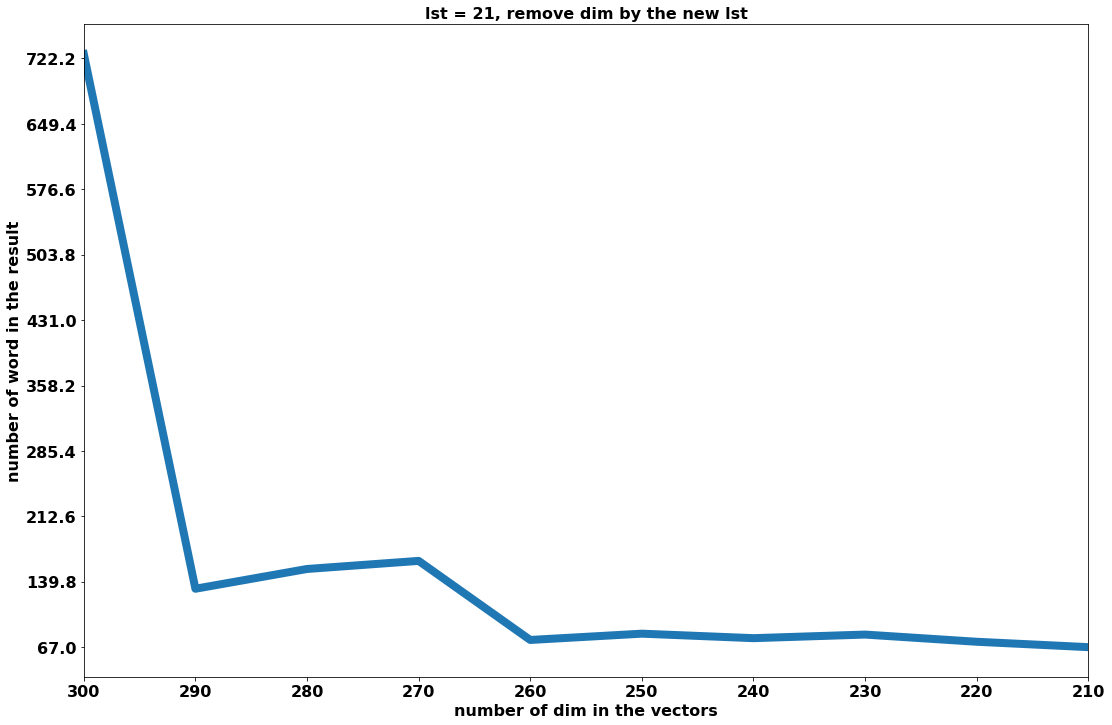

In [27]:
x = range(300,200,-10)
q=[]
for i in range(len(arr)-1):
        q.append(len(utils.one_mean(arr[i][0],arr[i][1])))
plt.plot(x,q,linewidth=8)
plt.xlabel("number of dim in the vectors",fontweight='bold',fontsize=16)
plt.ylabel("number of word in the result",fontweight='bold',fontsize=16)
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 3 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 10.0),fontweight='bold',fontsize=16)
plt.yticks(numpy.arange(min(q), max(q)+1, ( max(q)+1)/10),fontweight='bold',fontsize=16)
plt.title("lst = "+str(len(arr[10][0]))+", remove dim by the new lst",fontweight='bold',fontsize=16)
plt.show()

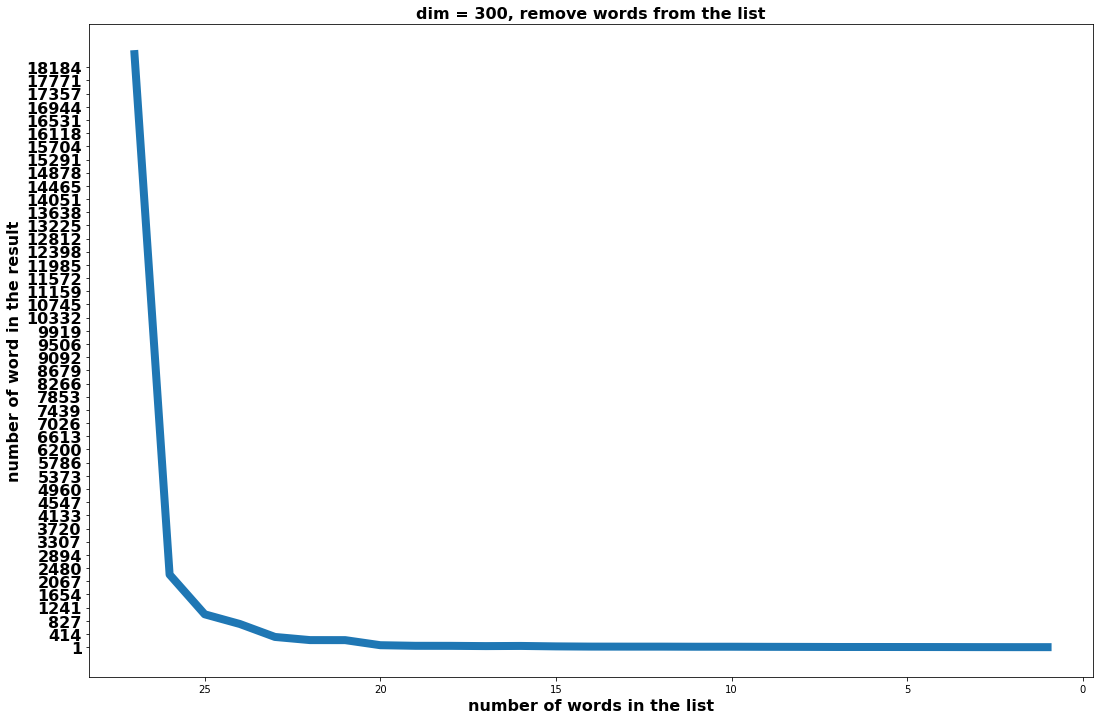

In [23]:
x = range(len(lst),0,-1)
q=[]
for i in range(len(lst)):
    temp=utils.remove_words_from_lst(lst,a,i)
    q.append(len(utils.one_mean(temp,a)))
plt.plot(x,q,linewidth=8)
plt.xlabel("number of words in the list",fontweight='bold',fontsize=16)
plt.ylabel("number of word in the result",fontweight='bold',fontsize=16)
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 3 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
#plt.xticks(numpy.arange(min(x), max(x)+1, 10.0),fontweight='bold',fontsize=16)
plt.yticks(numpy.arange(min(q), max(q)+1, ( max(q)+1)/45),fontweight='bold',fontsize=16)
plt.title("dim = 300, remove words from the list",fontweight='bold',fontsize=16)
plt.show()

In [26]:
arr =[]
arr.append((lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb")))
for i in range(10,110,10):
    arr.append(utils.remove_dim_and_words(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),i,6))
arr[0]=(utils.remove_words_from_lst(lst,arr[0][1],3),arr[0][1])

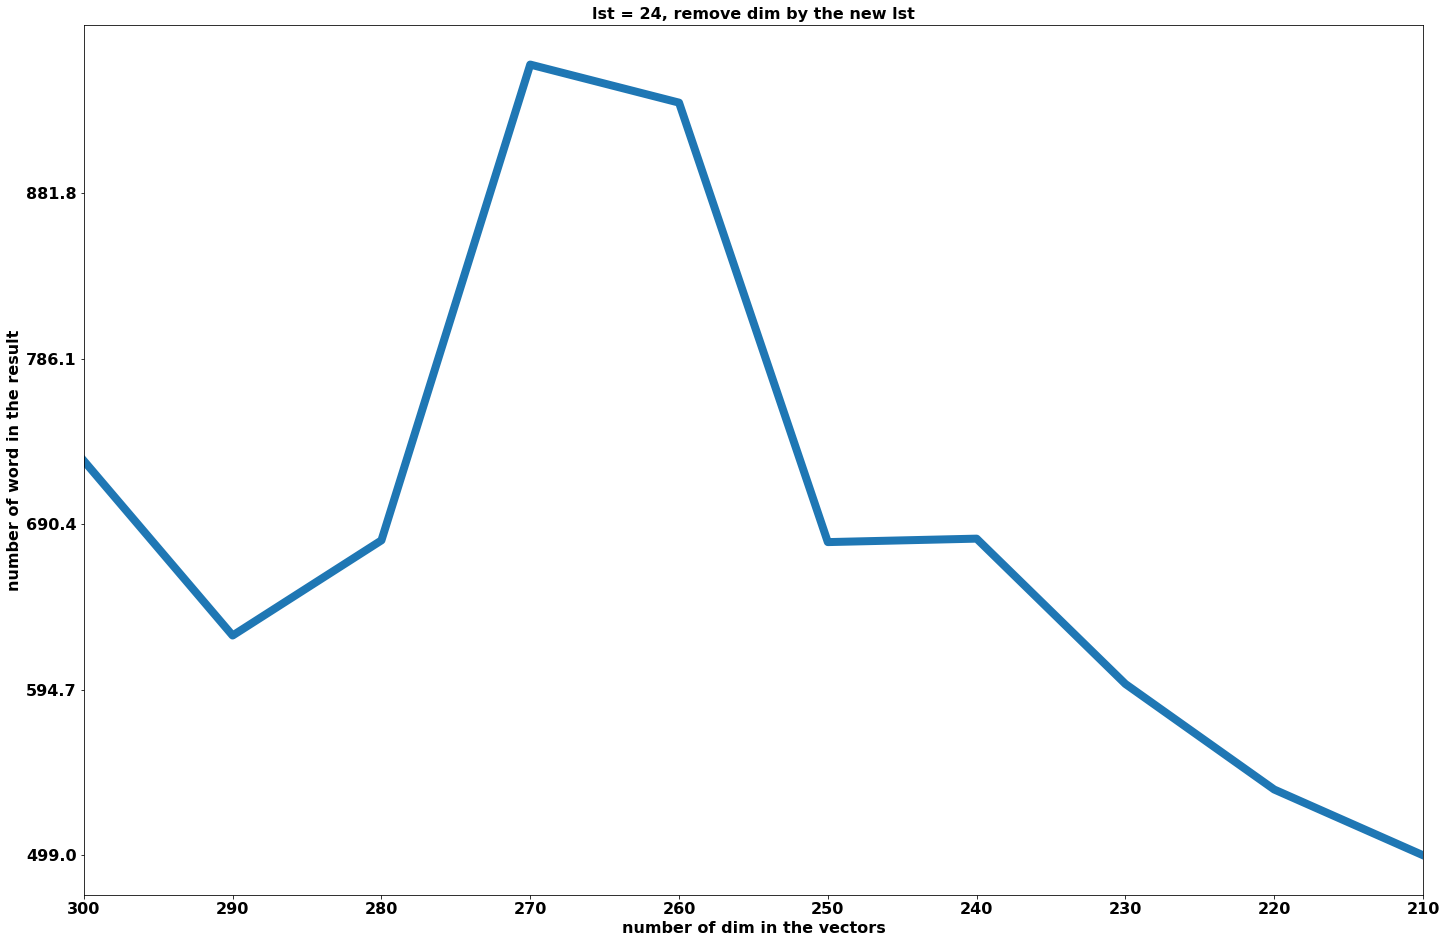

In [15]:
x = range(300,200,-10)
q=[]
for i in range(len(arr)-1):
        q.append(len(utils.one_mean(arr[i][0],arr[i][1])))
plt.plot(x,q,linewidth=8)
plt.xlabel("number of dim in the vectors",fontweight='bold',fontsize=16)
plt.ylabel("number of word in the result",fontweight='bold',fontsize=16)
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 4 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 10.0),fontweight='bold',fontsize=16)
plt.yticks(numpy.arange(min(q), max(q)+1, ( max(q)+1)/10),fontweight='bold',fontsize=16)
plt.title("lst = "+str(len(arr[10][0]))+", remove dim by the new lst",fontweight='bold',fontsize=16)
plt.show()

In [108]:
arr =[]
arr.append((lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb")))
for i in range(10,110,10):
    arr.append(utils.remove_dim_and_words(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),i,0))
arr[0]=(utils.remove_words_from_lst(lst,arr[0][1],0),arr[0][1])

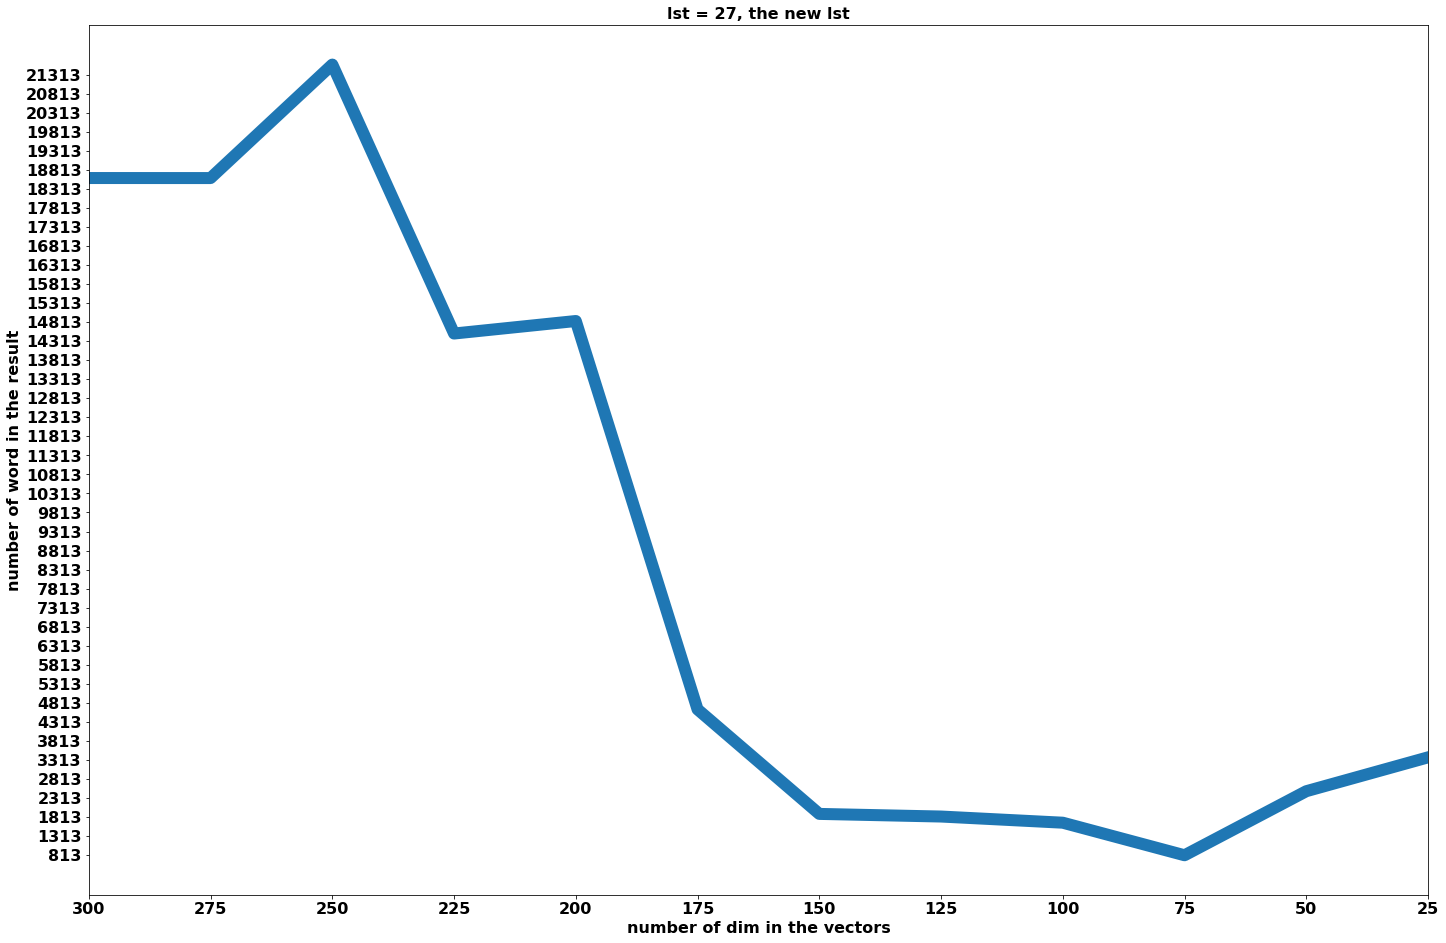

In [12]:
x = range(300,0,-25)
q=[]
for i in range(len(arr)-1):
        q.append(len(utils.one_mean(arr[i][0],arr[i][1])))
plt.plot(x,q, linewidth=12)
plt.xlabel("number of dim in the vectors",fontweight='bold',fontsize=16)
plt.ylabel("number of word in the result",fontweight='bold',fontsize=16)
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 4 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 25.0),fontweight='bold',fontsize=16)
plt.yticks(numpy.arange(min(q), max(q)+1, 500.0),fontweight='bold',fontsize=16)
plt.title("lst = "+str(len(arr[10][0]))+", the new lst",fontweight='bold',fontsize=16)
plt.show()

12
Word2Vec(vocab=241788, size=100, alpha=0.025)  the dim is:  100
Word2Vec(vocab=164667, size=100, alpha=0.025)  the dim is:  100
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  300
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  290
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  280
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  270
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  260
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  250
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  240
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  230
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  220
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  210
0 - 0 . number of word in the result: 179154
1 - 0 . number of word in the result: 8862
2 - 0 . number of word in the result: 2090
3 - 0 . number of word in the result: 2257
4 - 0 . number of word in the result: 636
5 - 0 . numbe

18 - 6 . number of word in the result: 9
19 - 6 . number of word in the result: 8
20 - 6 . number of word in the result: 7
21 - 6 . number of word in the result: 6
22 - 6 . number of word in the result: 5
23 - 6 . number of word in the result: 4
24 - 6 . number of word in the result: 2
25 - 6 . number of word in the result: 1
26 - 6 . number of word in the result: 0
0 - 7 . number of word in the result: 14512
1 - 7 . number of word in the result: 1487
2 - 7 . number of word in the result: 637
3 - 7 . number of word in the result: 850
4 - 7 . number of word in the result: 150
5 - 7 . number of word in the result: 132
6 - 7 . number of word in the result: 126
7 - 7 . number of word in the result: 69
8 - 7 . number of word in the result: 41
9 - 7 . number of word in the result: 32
10 - 7 . number of word in the result: 29
11 - 7 . number of word in the result: 27
12 - 7 . number of word in the result: 27
13 - 7 . number of word in the result: 18
14 - 7 . number of word in the result: 17
1

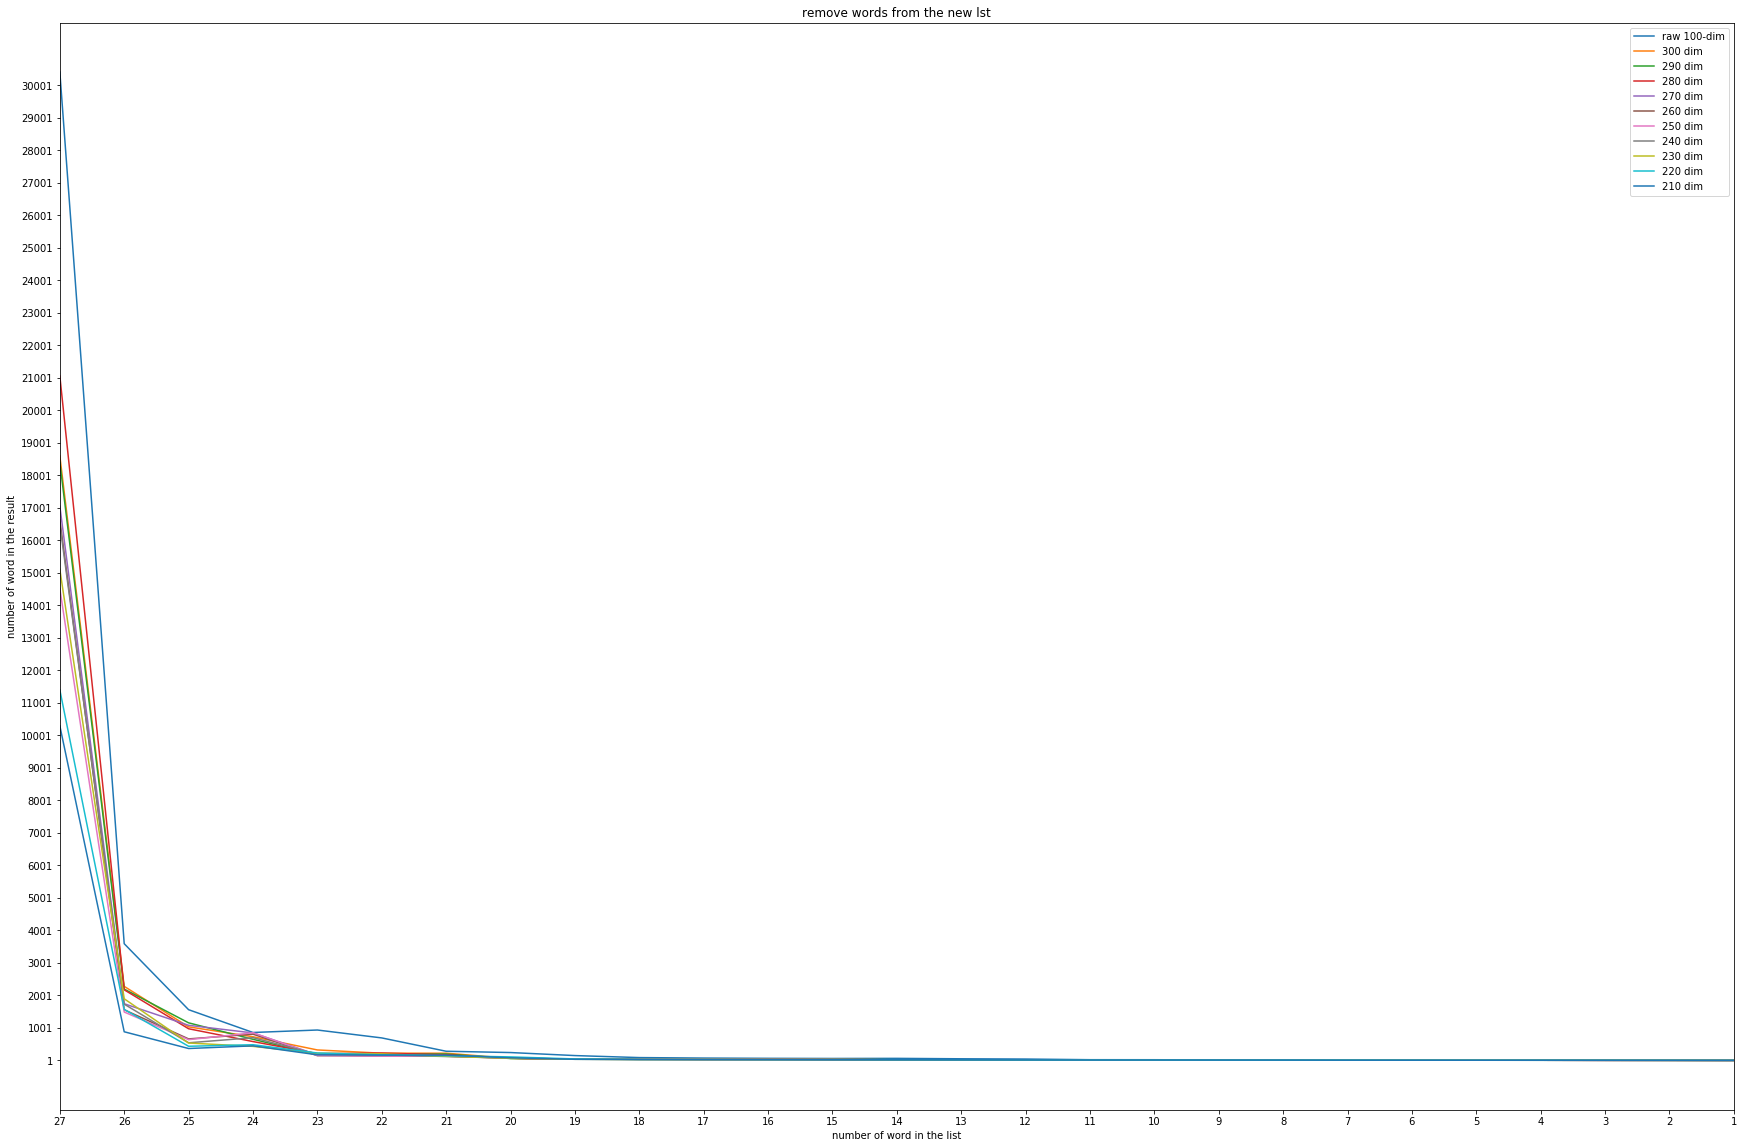

In [18]:
arr=[]
arr.append(gensim.models.Word2Vec.load("w2v_1_heb"))
arr.append(gensim.models.Word2Vec.load("heb_56"))
for i in range(10):
    arr.append(utils.remove_dim(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),300-(i*10)))
print(len(arr))
for i in arr:
    print(i," the dim is: ",len(i.wv.get_vector("תורה")))
res2=[]
reslst=[]
templst=[]
for i in range(len(arr)):
    templst.append(lst)
for i in range(len(arr)):
    res2.append([])
    reslst.append(templst.copy())
    for j in range(len(lst)):
        print(j,"-",i,". number of word in the result: "+str(len(utils.one_mean(templst[i],arr[i]))))
        res2[i].append(len(utils.one_mean(templst[i],arr[i])))
        dist = []
        for word in templst[i]:
            temp=utils.my_similarity(arr[i].wv.get_vector(word),utils.avg_vec_model(templst[i],arr[i]))
            dist.append((word,temp))
        dist.sort(key=lambda k:k[1])
        del dist[0]
        ldist=[e[0] for e in dist]
        templst[i]=ldist
x= numpy.arange(len(lst),0,-1)
plt.plot(x,res2[1], label="raw 100-dim")
for i in range(len(res2)-2):
    plt.plot(x,res2[i+2], label=str(300-i*10)+" dim")
plt.xlabel("number of word in the list")
plt.ylabel("number of word in the result")
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 5 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 1.0))
plt.yticks(numpy.arange(min(res2[1]), max(res2[1])+1, 1000.0))
plt.title("remove words from the new lst")
plt.legend()
plt.show()

In [3]:
plt.plot(x,res2[1], label="raw 100-dim",linewidth=12)
for i in range(len(res2)-2):
    plt.plot(x,res2[i+2], label=str(300-i*10)+" dim",linewidth=12)
plt.xlabel("number of word in the list",fontweight='bold',fontsize=16)
plt.ylabel("number of word in the result",fontweight='bold',fontsize=16)
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 1 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 1.0),fontweight='bold',fontsize=16)
plt.yticks(numpy.arange(min(res2[1]), max(res2[1])+1, 200.0),fontweight='bold',fontsize=16)
plt.title("remove words from the new lst",fontweight='bold',fontsize=16)
plt.legend()
plt.show()

NameError: name 'x' is not defined

In [8]:
t=utils.remove_dim(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),200)

In [9]:
t.wv.get_vector("תורה") == arr[10][1].wv.get_vector("תורה")

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:

def my_var(lst,model):
    a = numpy.array([])
    for i in lst:
        a = numpy.append(a, model.wv.get_vector(i))
    a = a.reshape(len(lst), len(model.wv.get_vector(lst[0])))
    res = numpy.var(a, axis=0)
    nres=[]
    for e in range(len(res)):
        nres.append([e,res[e]])
    return nres


In [11]:
my_var(arr[10][0],arr[10][1]) == utils.my_var(arr[10][0],arr[10][1])

True

In [12]:
(my_var(arr[10][0],arr[0][1])[:200])

[[0, 1.5129264784604735],
 [1, 2.9839800156615763],
 [2, 4.004053913830824],
 [3, 1.5082345205034848],
 [4, 2.3247876292326732],
 [5, 2.7995571816384053],
 [6, 1.098556308023204],
 [7, 1.875723711936873],
 [8, 1.8872144231048382],
 [9, 2.2365288736634725],
 [10, 2.6318373222860445],
 [11, 1.5416964547561491],
 [12, 2.7342642465623066],
 [13, 1.6191374848117885],
 [14, 1.2275563243389394],
 [15, 3.1330730642418163],
 [16, 3.281605144175721],
 [17, 2.313925053277925],
 [18, 1.3703305366010863],
 [19, 1.5233518490910045],
 [20, 2.5340028176074134],
 [21, 1.1628805831914761],
 [22, 1.6022439936347073],
 [23, 4.430247134773008],
 [24, 1.5297496681855314],
 [25, 2.0261176883893617],
 [26, 0.9117559988535864],
 [27, 1.7814067887934224],
 [28, 2.1570481380165325],
 [29, 3.7065769948589984],
 [30, 4.231514201610453],
 [31, 1.967079195154043],
 [32, 2.198900546356266],
 [33, 2.5210435299327485],
 [34, 2.2945523427795127],
 [35, 2.5222957210896055],
 [36, 1.2576731610255194],
 [37, 1.761540875674

In [13]:
varr=[]
var_lst=(my_var(arr[10][0],arr[10][1]))
var_lst.sort(key=lambda k:k[1])
for i in var_lst[:200]:
    varr.append(i[0])
varr.sort()

varr1=[]
var_lst1=(my_var(arr[10][0],arr[0][1]))
var_lst1.sort(key=lambda k:k[1])
for i in var_lst1[:200]:
    varr1.append(i[0])
varr1.sort()


In [14]:
varr==varr1

False

In [15]:
varr1

[0,
 3,
 6,
 7,
 8,
 11,
 13,
 14,
 18,
 19,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 31,
 32,
 36,
 37,
 40,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 53,
 54,
 55,
 57,
 58,
 59,
 62,
 63,
 64,
 65,
 67,
 68,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 107,
 109,
 111,
 112,
 113,
 114,
 116,
 117,
 119,
 121,
 122,
 124,
 125,
 126,
 128,
 129,
 131,
 133,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 145,
 147,
 148,
 149,
 151,
 153,
 154,
 155,
 158,
 159,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 168,
 170,
 173,
 174,
 175,
 176,
 179,
 180,
 181,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 197,
 198,
 199,
 200,
 202,
 203,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 215,
 216,
 217,
 219,
 222,
 223,
 225,
 226,
 228,
 229,
 230,
 231,
 232,
 233,
 235,
 236,
 237,
 240,
 245,
 246,
 249,
 250,
 251,
 252,
 253,
 255,
 257,
 258,
 259,
 260,
 261,
 262,
 264,
 

In [16]:
org_vec_arr10=arr[10][1].wv.vectors

In [17]:
len(org_vec_arr10[0])

200

In [18]:
org_vec_arr1=arr[0][1].wv.vectors

In [19]:
len(org_vec_arr1[0])

300

In [20]:
vectors=arr[10][1].wv.vectors[:,varr]
arr[10][1].wv.vectors=vectors
arr[10][1].wv.vectors_norm=None
arr[10][1].wv.init_sims()

vectors=arr[0][1].wv.vectors[:,varr1]
arr[0][1].wv.vectors=vectors
arr[0][1].wv.vectors_norm=None
arr[0][1].wv.init_sims()
arr[10][1].wv.get_vector("תורה") == arr[0][1].wv.get_vector("תורה")


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [123]:
m56=arr[5][1]
n1=arr[0][1]
templst=lst

t=(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"))
org_vec_arr1=t[1].wv.vectors
t[1].wv.vectors=org_vec_arr1
t[1].wv.vectors_norm=None
t[1].wv.init_sims()
print(templst)
for i in range(len(lst)):
    l1=utils.one_mean(templst,m56)
    ln1=utils.one_mean(templst,n1)
    print("round number: "+str(i)+"\nnumber of element in the list: "+str(len(templst)))
    print("\n=====\n\nin the "+str(len(m56.wv.get_vector("תורה")))+"dim vectors:")
    print("number of word in all the vocab: "+str(len(m56.wv.vocab)))
    print("number of word in the result: "+str(len(l1)))
    print("element in the list/word in the vocab: "+str(len(l1)/len(m56.wv.vocab)))
    print("first 20 similar:")
    res=m56.wv.similar_by_vector(utils.avg_vec_model(templst,m56),topn=20)
    for j in range(20):
        print(str(j+1)+". \t"+res[j][0]+" \tsimilarity: "+str(res[j][1]))
   
   
    t[1].wv.vectors=org_vec_arr1
    t[1].wv.vectors_norm=None
    t[1].wv.init_sims()
    t=utils.remove_dim_and_words(lst,t[1],300-len(m56.wv.get_vector("תורה")),i)
   
    tres=utils.one_mean(t[0],t[1])
    print("\n*****\n\nin the "+str(len(t[1].wv.get_vector("תורה")))+"dim !!with update dim!!! vectors:")
    print("number of word in all the vocab: "+str(len(t[1].wv.vocab)))
    print("number of word in the result: "+str(len(tres)))
    print("element in the list/word in the vocab: "+str(len(tres)/len(t[1].wv.vocab)))
    print("first 20 similar:")
    res=t[1].wv.similar_by_vector(utils.avg_vec_model(t[0],t[1]),topn=20)
    for i in range(20):
        print(str(i+1)+". \t"+res[i][0]+" \tsimilarity: "+str(res[i][1]))

    
    print("\n+++++\n\nin the "+str(len(n1.wv.get_vector("תורה")))+"dim vectors:")
    print("number of word in all the vocab: "+str(len(n1.wv.vocab)))
    print("number of word in the result: "+str(len(ln1)))
    print("element in the list/word in the vocab: "+str(len(ln1)/len(n1.wv.vocab)))
    print("first 20 similar:")
    res=n1.wv.similar_by_vector(utils.avg_vec_model(templst,n1),topn=20)
    for i in range(20):
        print(str(i+1)+". \t"+res[i][0]+" \tsimilarity: "+str(res[i][1]))
    dist = []
    for word in templst:
        temp=utils.my_similarity(m56.wv.get_vector(word),utils.avg_vec_model(templst,m56))
        dist.append((word,temp))
    dist.sort(key=lambda k:k[1])
    print("\n\n\ncosim of the words and the avg vec")
    print(dist)
    print("\n\ndelete the word:\n"+dist[0][0]+"\ncosim from avg is: "+str(dist[0][1])+"\n\n------------------------------------------------------------------------------------------\n\n------------------------------------------------------------------------------------------\n\n")
    del dist[0]
    ldist=[e[0] for e in dist]
    templst=ldist

templst=lst
for i in range(len(lst)):
    l1=utils.one_mean(templst,m56)
    ln1=utils.one_mean(templst,n1)
    print("round number: "+str(i)+"\nnumber of element in the list: "+str(len(templst)))
    print("\n=====\n\nin the "+str(len(m56.wv.get_vector("תורה")))+"dim vectors:")
    print("number of word in all the vocab: "+str(len(m56.wv.vocab)))
    print("number of word in the result: "+str(len(l1)))
    print("element in the list/word in the vocab: "+str(len(l1)/len(m56.wv.vocab)))
    
    t[1].wv.vectors=org_vec_arr1
    t[1].wv.vectors_norm=None
    t[1].wv.init_sims()
    t=utils.remove_dim_and_words(lst,t[1],300-len(m56.wv.get_vector("תורה")),i)
    tres=utils.one_mean(t[0],t[1])
    print("\n*****\n\nin the "+str(len(t[1].wv.get_vector("תורה")))+"dim !!with update dim!!! vectors:")
    print("number of word in all the vocab: "+str(len(t[1].wv.vocab)))
    print("number of word in the result: "+str(len(tres)))
    print("element in the list/word in the vocab: "+str(len(tres)/len(t[1].wv.vocab)))

    print("\n+++++\n\nin the "+str(len(n1.wv.get_vector("תורה")))+"dim vectors:")
    print("number of word in all the vocab: "+str(len(n1.wv.vocab)))
    print("number of word in the result: "+str(len(ln1)))
    print("element in the list/word in the vocab: "+str(len(ln1)/len(n1.wv.vocab)))
    dist = []
    for word in templst:
        temp=utils.my_similarity(m56.wv.get_vector(word),utils.avg_vec_model(templst,m56))
        dist.append((word,temp))
    dist.sort(key=lambda k:k[1])
    print("\n\n\ncosim of the words and the avg vec")
    print(dist)
    print("\n\ndelete the word:\n"+dist[0][0]+"\ncosim from avg is: "+str(dist[0][1])+"\n\n------------------------------------------------------------------------------------------\n\n------------------------------------------------------------------------------------------\n\n")
    del dist[0]
    ldist=[e[0] for e in dist]
    templst=ldist


['נר"ו', 'יצ"ו', 'זצוק"ל', 'הי"ו', 'זלה"ה', 'שליט"א', 'נ"י', 'עט"ר', 'זללה"ה', 'ז"ל', 'מו"ר', 'זי"ע', 'נ"ר', "ני'", 'ידידי', 'אהובי', 'ידי"נ', 'נ"ע', 'נלב"ע', 'מ"ר', 'שיחיה', "שיחי'", 'אאמו"ר', 'מו"ח', 'זצלה"ה', 'זצוקללה"ה', 'ידינ"פ']
round number: 0
number of element in the list: 27

=====

in the 250dim vectors:
number of word in all the vocab: 164667
number of word in the result: 14512
element in the list/word in the vocab: 0.08812937625632337
first 20 similar:
1. 	זצ"ל 	similarity: 0.8067448139190674
2. 	נר"ו 	similarity: 0.799895167350769
3. 	שליט"א 	similarity: 0.7800001502037048
4. 	נ"י 	similarity: 0.7576900124549866
5. 	זצוק"ל 	similarity: 0.738030195236206
6. 	הי"ו 	similarity: 0.7222652435302734
7. 	יצ"ו 	similarity: 0.717519223690033
8. 	זלה"ה 	similarity: 0.6704824566841125
9. 	זצללה"ה 	similarity: 0.6646267771720886
10. 	שיחי' 	similarity: 0.6527162790298462
11. 	זצלה"ה 	similarity: 0.6512709856033325
12. 	ני' 	similarity: 0.6490405797958374
13. 	מחותני 	similarity: 0.644

number of element in the list: 25

=====

in the 250dim vectors:
number of word in all the vocab: 164667
number of word in the result: 637
element in the list/word in the vocab: 0.003868413221835583
first 20 similar:
1. 	זצ"ל 	similarity: 0.8071621060371399
2. 	נר"ו 	similarity: 0.8043184876441956
3. 	שליט"א 	similarity: 0.7876245975494385
4. 	נ"י 	similarity: 0.7664127349853516
5. 	זצוק"ל 	similarity: 0.7399364113807678
6. 	הי"ו 	similarity: 0.7206142544746399
7. 	יצ"ו 	similarity: 0.7194995284080505
8. 	זלה"ה 	similarity: 0.6751781702041626
9. 	זצללה"ה 	similarity: 0.6615993976593018
10. 	ני' 	similarity: 0.6571528911590576
11. 	שיחי' 	similarity: 0.6555594205856323
12. 	מחותני 	similarity: 0.646014928817749
13. 	זצלה"ה 	similarity: 0.6429397463798523
14. 	ידידי 	similarity: 0.6286519765853882
15. 	זללה"ה 	similarity: 0.6132282018661499
16. 	הרה"ג 	similarity: 0.6098998785018921
17. 	זי"ע 	similarity: 0.608823835849762
18. 	נר"י 	similarity: 0.6055635809898376
19. 	הה"ג 	similarity: 


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 131
element in the list/word in the vocab: 0.0007955449482895784
first 20 similar:
1. 	זצ"ל 	similarity: 0.8101379871368408
2. 	נר"ו 	similarity: 0.8101141452789307
3. 	שליט"א 	similarity: 0.785257875919342
4. 	נ"י 	similarity: 0.7591559290885925
5. 	זצוק"ל 	similarity: 0.7333454489707947
6. 	יצ"ו 	similarity: 0.7284343838691711
7. 	הי"ו 	similarity: 0.7272311449050903
8. 	זלה"ה 	similarity: 0.7170894742012024
9. 	זצללה"ה 	similarity: 0.6846550703048706
10. 	שיחי' 	similarity: 0.649301290512085
11. 	זצלה"ה 	similarity: 0.6442595720291138
12. 	זללה"ה 	similarity: 0.6434605717658997
13. 	ני' 	similarity: 0.6335070729255676
14. 	ידידי 	similarity: 0.6148626804351807
15. 	נר"י 	similarity: 0.608810544013977
16. 	שי' 	similarity: 0.6074697971343994
17. 	מחותני 	similarity: 0.604008138179779
18. 	המובהק 	similarity: 0.6021776795387268
19. 	זי"ע 	similarity: 0.598065376281


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 48
element in the list/word in the vocab: 0.0002914973856328226
first 20 similar:
1. 	זצ"ל 	similarity: 0.837975800037384
2. 	שליט"א 	similarity: 0.8037371635437012
3. 	נר"ו 	similarity: 0.798366129398346
4. 	נ"י 	similarity: 0.778509795665741
5. 	זצוק"ל 	similarity: 0.774632453918457
6. 	זלה"ה 	similarity: 0.7339770197868347
7. 	יצ"ו 	similarity: 0.7257647514343262
8. 	הי"ו 	similarity: 0.7256070375442505
9. 	זצללה"ה 	similarity: 0.7079558968544006
10. 	ני' 	similarity: 0.6904383897781372
11. 	זצלה"ה 	similarity: 0.6856236457824707
12. 	זללה"ה 	similarity: 0.6742643117904663
13. 	מחותני 	similarity: 0.6333106160163879
14. 	שיחי' 	similarity: 0.6302293539047241
15. 	נר"י 	similarity: 0.6187352538108826
16. 	זי"ע 	similarity: 0.614977240562439
17. 	שי' 	similarity: 0.614245593547821
18. 	זצל"ה 	similarity: 0.6074978113174438
19. 	ידידי 	similarity: 0.5984396934509277


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 39
element in the list/word in the vocab: 0.00023684162582666838
first 20 similar:
1. 	שליט"א 	similarity: 0.8100864887237549
2. 	זצ"ל 	similarity: 0.8071879744529724
3. 	נר"ו 	similarity: 0.7918998599052429
4. 	נ"י 	similarity: 0.7856497764587402
5. 	יצ"ו 	similarity: 0.7778897285461426
6. 	זצוק"ל 	similarity: 0.7616901397705078
7. 	הי"ו 	similarity: 0.7540245652198792
8. 	ני' 	similarity: 0.7008250951766968
9. 	זצללה"ה 	similarity: 0.6874861717224121
10. 	זללה"ה 	similarity: 0.6815012693405151
11. 	שיחי' 	similarity: 0.6719581484794617
12. 	זלה"ה 	similarity: 0.6711385846138
13. 	זצלה"ה 	similarity: 0.6623615026473999
14. 	נ"ע 	similarity: 0.6287590265274048
15. 	זי"ע 	similarity: 0.614009439945221
16. 	ידידי 	similarity: 0.6109473705291748
17. 	מחותני 	similarity: 0.6105691194534302
18. 	שי' 	similarity: 0.6021178960800171
19. 	נר"י 	similarity: 0.601680397987365


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 24
element in the list/word in the vocab: 0.0001457486928164113
first 20 similar:
1. 	זצ"ל 	similarity: 0.8306899666786194
2. 	שליט"א 	similarity: 0.8203901648521423
3. 	נ"י 	similarity: 0.8118681311607361
4. 	נר"ו 	similarity: 0.8020524382591248
5. 	יצ"ו 	similarity: 0.7834318280220032
6. 	זצוק"ל 	similarity: 0.7715270519256592
7. 	הי"ו 	similarity: 0.753473162651062
8. 	ני' 	similarity: 0.7234130501747131
9. 	זלה"ה 	similarity: 0.7024332880973816
10. 	זצללה"ה 	similarity: 0.7021557688713074
11. 	זללה"ה 	similarity: 0.698792576789856
12. 	זצלה"ה 	similarity: 0.6766188740730286
13. 	שיחי' 	similarity: 0.6724380254745483
14. 	נ"ע 	similarity: 0.6591545343399048
15. 	זי"ע 	similarity: 0.6438667178153992
16. 	שי' 	similarity: 0.6183773875236511
17. 	נר"י 	similarity: 0.6161397099494934
18. 	י"ץ 	similarity: 0.5977926850318909
19. 	זצל"ה 	similarity: 0.5799008011817932


1. 	שליט"א 	similarity: 0.8469564914703369
2. 	נר"ו 	similarity: 0.8284230828285217
3. 	נ"י 	similarity: 0.828233540058136
4. 	זצ"ל 	similarity: 0.8179467916488647
5. 	הי"ו 	similarity: 0.766038715839386
6. 	זצוק"ל 	similarity: 0.7598099708557129
7. 	יצ"ו 	similarity: 0.7536022663116455
8. 	ני' 	similarity: 0.7268537878990173
9. 	זלה"ה 	similarity: 0.6788411140441895
10. 	זצלה"ה 	similarity: 0.6675031185150146
11. 	שיחי' 	similarity: 0.6578577756881714
12. 	זצללה"ה 	similarity: 0.6538923382759094
13. 	נר"י 	similarity: 0.6247739195823669
14. 	זי"ע 	similarity: 0.6118943691253662
15. 	שי' 	similarity: 0.6106410026550293
16. 	הרה"ג 	similarity: 0.5818127989768982
17. 	י"ץ 	similarity: 0.5816935300827026
18. 	זללה"ה 	similarity: 0.573724091053009
19. 	הגאב"ד 	similarity: 0.5647139549255371
20. 	זצל"ה 	similarity: 0.5645803809165955

*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 11
element in the list/word in the vo


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 9
element in the list/word in the vocab: 5.4655759806154237e-05
first 20 similar:
1. 	נר"ו 	similarity: 0.8911496996879578
2. 	נ"י 	similarity: 0.8765246272087097
3. 	שליט"א 	similarity: 0.8574120402336121
4. 	הי"ו 	similarity: 0.8333405256271362
5. 	יצ"ו 	similarity: 0.8215292096138
6. 	ני' 	similarity: 0.8013318777084351
7. 	זצ"ל 	similarity: 0.7814810276031494
8. 	זצוק"ל 	similarity: 0.7668508887290955
9. 	זלה"ה 	similarity: 0.7504982352256775
10. 	נר"י 	similarity: 0.6719898581504822
11. 	שי' 	similarity: 0.6318426132202148
12. 	י"ץ 	similarity: 0.6313773393630981
13. 	דק"ק 	similarity: 0.5930607914924622
14. 	שיחי' 	similarity: 0.5816109776496887
15. 	זצללה"ה 	similarity: 0.57895827293396
16. 	זצלה"ה 	similarity: 0.5723232626914978
17. 	נ"ע 	similarity: 0.5714521408081055
18. 	ני"ו 	similarity: 0.5698095560073853
19. 	מהר"ר 	similarity: 0.54988694190979
20. 	יע


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 5
element in the list/word in the vocab: 3.036431100341902e-05
first 20 similar:
1. 	נ"י 	similarity: 0.9428682327270508
2. 	שליט"א 	similarity: 0.8841463327407837
3. 	נר"ו 	similarity: 0.8724097013473511
4. 	ני' 	similarity: 0.8714016079902649
5. 	הי"ו 	similarity: 0.8673983812332153
6. 	יצ"ו 	similarity: 0.7315296530723572
7. 	זצ"ל 	similarity: 0.6874761581420898
8. 	נר"י 	similarity: 0.6777247190475464
9. 	שי' 	similarity: 0.657959520816803
10. 	זצוק"ל 	similarity: 0.6351468563079834
11. 	שיחי' 	similarity: 0.6086485981941223
12. 	דק"ק 	similarity: 0.6060337424278259
13. 	י"ץ 	similarity: 0.5965365171432495
14. 	הגאב"ד 	similarity: 0.5853538513183594
15. 	הגנ"י 	similarity: 0.5819177627563477
16. 	הרה"ג 	similarity: 0.5723825097084045
17. 	ני"ו 	similarity: 0.5707021951675415
18. 	זלה"ה 	similarity: 0.5543704032897949
19. 	לאי"ט 	similarity: 0.5483778715133667
20


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 2
element in the list/word in the vocab: 1.214572440136761e-05
first 20 similar:
1. 	שליט"א 	similarity: 0.9737770557403564
2. 	נ"י 	similarity: 0.9687036275863647
3. 	ני' 	similarity: 0.826647937297821
4. 	זצ"ל 	similarity: 0.6872451901435852
5. 	נר"ו 	similarity: 0.6811935901641846
6. 	הי"ו 	similarity: 0.6719647645950317
7. 	שי' 	similarity: 0.6540322303771973
8. 	נר"י 	similarity: 0.644058883190155
9. 	יצ"ו 	similarity: 0.6368227601051331
10. 	דק"ק 	similarity: 0.6240191459655762
11. 	שיחי' 	similarity: 0.6115386486053467
12. 	אבד"ק 	similarity: 0.5950611233711243
13. 	ני"ו 	similarity: 0.5886838436126709
14. 	הגאב"ד 	similarity: 0.5792232155799866
15. 	ידידי 	similarity: 0.5781066417694092
16. 	הגנ"י 	similarity: 0.5651998519897461
17. 	מו"ה 	similarity: 0.5570255517959595
18. 	הרה"ג 	similarity: 0.5532211661338806
19. 	זצוק"ל 	similarity: 0.5518843531608582
20


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 555
element in the list/word in the vocab: 0.0033704385213795115

+++++

in the 300dim vectors:
number of word in all the vocab: 164667
number of word in the result: 1031
element in the list/word in the vocab: 0.006261120928905003



cosim of the words and the avg vec
[('מו"ח', 0.38987076), ('אאמו"ר', 0.39339226), ('נ"ר', 0.45535028), ('שיחיה', 0.45562115), ('אהובי', 0.46185577), ('זצוקללה"ה', 0.48850405), ('ז"ל', 0.4980509), ('ידינ"פ', 0.5569383), ('ידי"נ', 0.56631005), ('נ"ע', 0.5778913), ('מו"ר', 0.5940647), ('עט"ר', 0.6000326), ('זי"ע', 0.6088238), ('זללה"ה', 0.6132281), ('ידידי', 0.62865204), ('זצלה"ה', 0.6429399), ("שיחי'", 0.65555924), ("ני'", 0.6571529), ('זלה"ה', 0.6751783), ('יצ"ו', 0.7194996), ('הי"ו', 0.7206142), ('זצוק"ל', 0.7399365), ('נ"י', 0.76641285), ('שליט"א', 0.7876242), ('נר"ו', 0.80431867)]


delete the word:
מו"ח
cosim from avg is: 0.38987076



*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 24
element in the list/word in the vocab: 0.0001457486928164113

+++++

in the 300dim vectors:
number of word in all the vocab: 164667
number of word in the result: 42
element in the list/word in the vocab: 0.0002550602124287198



cosim of the words and the avg vec
[('מו"ר', 0.5703757), ('ידינ"פ', 0.5736437), ('ידי"נ', 0.5812332), ('נ"ע', 0.58499897), ('עט"ר', 0.5881459), ('זי"ע', 0.60735726), ('זללה"ה', 0.6178143), ('ידידי', 0.62656546), ("שיחי'", 0.650712), ('זצלה"ה', 0.65326416), ('זלה"ה', 0.67201567), ("ני'", 0.67685777), ('הי"ו', 0.7463278), ('יצ"ו', 0.7472198), ('זצוק"ל', 0.74866897), ('נ"י', 0.7788794), ('נר"ו', 0.8118473), ('שליט"א', 0.8189593)]


delete the word:
מו"ר
cosim from avg is: 0.5703757

------------------------------------------------------------------------------------------

---------------------------------------------------------------------


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 11
element in the list/word in the vocab: 6.680148420752184e-05

+++++

in the 300dim vectors:
number of word in all the vocab: 164667
number of word in the result: 16
element in the list/word in the vocab: 9.716579521094087e-05



cosim of the words and the avg vec
[('זי"ע', 0.61189455), ("שיחי'", 0.6578578), ('זצלה"ה', 0.6675031), ('זלה"ה', 0.67884123), ("ני'", 0.7268535), ('יצ"ו', 0.75360215), ('זצוק"ל', 0.7598096), ('הי"ו', 0.7660384), ('נ"י', 0.8282335), ('נר"ו', 0.8284233), ('שליט"א', 0.84695673)]


delete the word:
זי"ע
cosim from avg is: 0.61189455

------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------


round number: 17
number of element in the list: 10

=====

in the 250dim vectors:
number of word in all the vocab: 164667
number 


*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 2
element in the list/word in the vocab: 1.214572440136761e-05

+++++

in the 300dim vectors:
number of word in all the vocab: 164667
number of word in the result: 1
element in the list/word in the vocab: 6.072862200683805e-06



cosim of the words and the avg vec
[('נ"י', 0.92008734), ('שליט"א', 0.94454765)]


delete the word:
נ"י
cosim from avg is: 0.92008734

------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------


round number: 26
number of element in the list: 1

=====

in the 250dim vectors:
number of word in all the vocab: 164667
number of word in the result: 0
element in the list/word in the vocab: 0.0

*****

in the 250dim !!with update dim!!! vectors:
number of word in all the vocab: 164667
number of word in the result: 0
element 

In [117]:

t[1].wv.vectors_norm=None
t[1].wv.init_sims()
t[1].wv.vectors

array([[-0.48525003,  1.7317646 , -0.04714761, ...,  0.35290185,
        -1.6523728 ,  0.01215274],
       [ 0.79182094, -0.77914655, -0.46187493, ..., -0.00533024,
        -4.4910975 ,  2.7444842 ],
       [ 2.9693623 ,  0.24051577,  2.0682635 , ...,  1.1239084 ,
        -2.4616501 ,  0.99951077],
       ...,
       [ 0.03912685,  0.5825456 ,  0.15630063, ...,  0.09828194,
        -0.04306413,  0.41347167],
       [ 0.560849  ,  0.93138075,  0.6558235 , ..., -0.01320359,
        -0.33731475,  0.11105844],
       [-0.45931098,  0.9952255 , -0.6406372 , ..., -0.12017659,
        -0.2152765 ,  0.9026981 ]], dtype=float32)

In [105]:
utils.one_mean(arr[10][0],arr[10][1])

[('זצ"ל', 0.8143579959869385),
 ('שליט"א', 0.8017643094062805),
 ('נר"ו', 0.79966139793396),
 ('יצ"ו', 0.7807592749595642),
 ('זצוק"ל', 0.7637472748756409),
 ('נ"י', 0.7632414698600769),
 ('הי"ו', 0.7348031997680664),
 ('זלה"ה', 0.7328014969825745),
 ('זצללה"ה', 0.6904473304748535),
 ("ני'", 0.673228919506073),
 ('זללה"ה', 0.6663669943809509),
 ("שיחי'", 0.6635441184043884),
 ('זצלה"ה', 0.6505926251411438),
 ('נ"ע', 0.6492523550987244),
 ('ידידי', 0.646187424659729),
 ('ידינ"פ', 0.6358377933502197),
 ('ידי"נ', 0.6205588579177856),
 ('זי"ע', 0.6180041432380676),
 ("שי'", 0.6176257729530334),
 ('מחותני', 0.6159528493881226),
 ('מכובדי', 0.6049573421478271),
 ('נר"י', 0.595999002456665),
 ('ידידנו', 0.5917333960533142),
 ('הה"ג', 0.5857928395271301),
 ('המובהק', 0.5843262672424316),
 ('זצל"ה', 0.5757265090942383),
 ('אדמו"ר', 0.5756150484085083),
 ('הרה"ג', 0.5755875110626221),
 ('היקר', 0.5746640563011169),
 ('ידיד"נ', 0.5743151307106018),
 ('י"ץ', 0.568587064743042),
 ('הנכבד', 0.566391

In [5]:
import matplotlib

In [26]:
def heatmap(data, row_labels, col_labels,ratio = 1, ax=None,
            cbar_kw={}, cbarlabel="",w=False ,**kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data,aspect=ratio , **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # for edge, spine in ax.spines.items():
    #    spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    if w:
        ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


In [49]:
datavec=numpy.array([])

In [8]:
import numpy as np

In [46]:
l1=utils.remove_dim_and_words(lst,a,dim_num=250,words_num=11)
l=l1[0]

In [50]:

for i in l:
    datavec=numpy.append(datavec,a.wv.word_vec( i ))
datavec = datavec.reshape(len(l), len(a.wv.get_vector(l[0])))

In [51]:
datavec.shape

(20, 50)

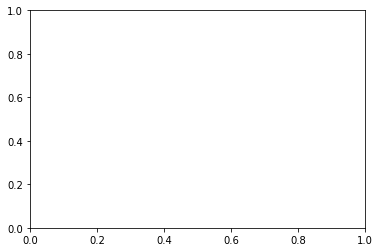

In [62]:
fig, ax = plt.subplots()

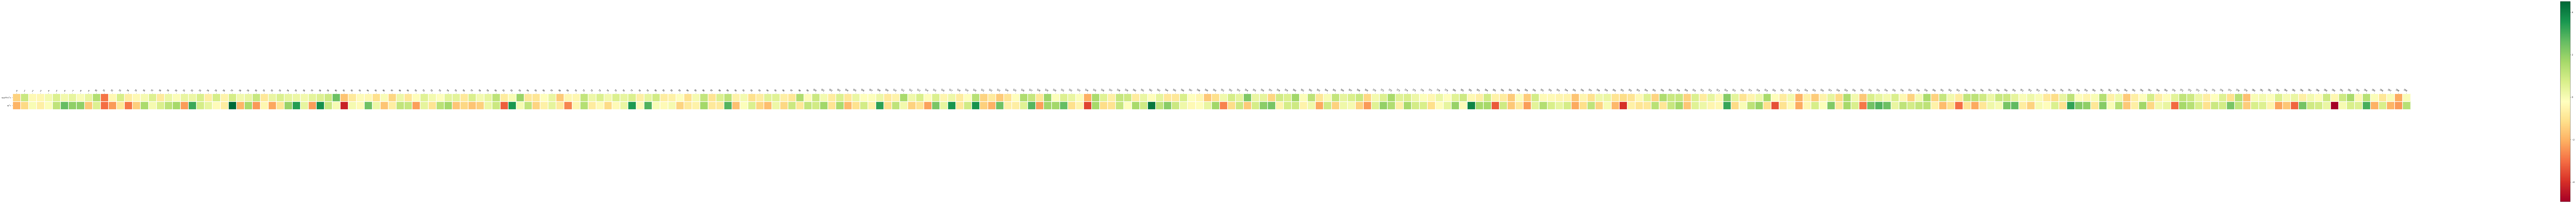

In [110]:
q=numpy.array([l[0],l[1]])
data=numpy.array([a.wv.get_vector(q[0]),a.wv.get_vector(q[1])])

fig, ax = plt.subplots()

im, cbar = heatmap(data, q, range(len(a.wv.get_vector(l[0]))), ax=ax,
                   cmap="RdYlGn",cbar_kw={'shrink': 0.1})
#fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor =35 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [28]:
a.wv.get_vector("מכונית")

array([ 2.5968099e+00, -7.6496810e-01,  1.2238892e+00,  4.0873781e-02,
       -5.0683939e-01, -2.1848433e+00,  6.6850996e-01,  6.3926256e-01,
        3.1496501e-01,  2.2556283e+00,  6.4742899e-01, -2.0886569e-01,
       -1.5182672e+00,  1.0012358e+00,  2.2015295e-03,  4.2395693e-01,
       -3.4429896e-01, -1.1842392e-01, -1.4637025e-01, -9.0475851e-01,
        1.7945189e+00, -1.7811462e-01, -9.1579133e-01,  7.3699570e-01,
       -2.8967974e-01,  1.6839095e+00, -2.0782242e+00,  1.3408805e+00,
        1.2221621e+00, -7.9300088e-01, -8.8338840e-01, -1.6434869e+00,
        5.4147327e-01,  2.0434096e-01, -1.2574894e+00,  2.8441769e-01,
       -1.0050888e+00,  9.6666288e-01, -1.3928874e+00, -3.4389719e-01,
       -2.3909397e+00, -8.3428025e-01,  1.4698427e+00, -8.1472325e-01,
       -8.3273792e-01,  4.1885939e+00, -6.0777354e-01,  2.8526384e-01,
       -1.4274480e+00,  2.9812174e-02], dtype=float32)

In [47]:
l.append("פרה")
l.append("דלת")
l.append("מכונית")
l.append("דלי")

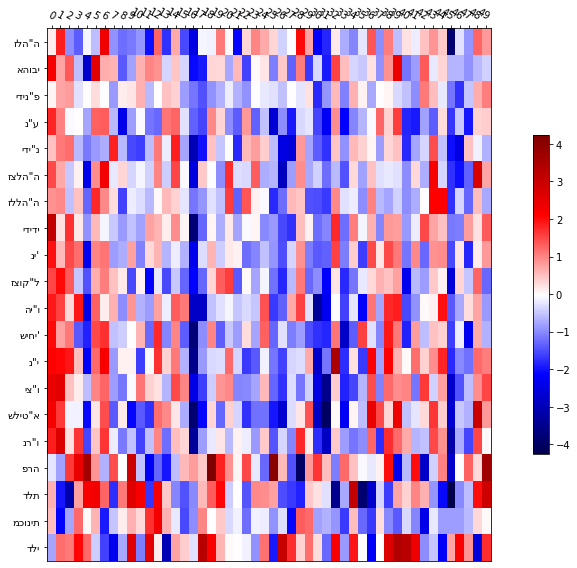

In [54]:

fig, ax = plt.subplots()

im, cbar = heatmap(datavec, l, range(len(a.wv.get_vector(l[0]))), ax=ax,
                   cmap="seismic",cbar_kw={'shrink': 0.6},ratio=3)
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [36]:
l

['נלב"ע',
 'זצוקללה"ה',
 'ידי"נ',
 'אהובי',
 "שיחי'",
 'ידידי',
 'ז"ל',
 'מו"ר',
 'ידינ"פ',
 'זי"ע',
 'נ"ע',
 'עט"ר',
 'זללה"ה',
 "ני'",
 'זצלה"ה',
 'הי"ו',
 'יצ"ו',
 'שליט"א',
 'זלה"ה',
 'זצוק"ל',
 'נ"י',
 'נר"ו',
 'פרה',
 'דלת',
 'מכונית',
 'דלי']

In [53]:
a.wv.get_vector(lst[0])

array([-0.99158615,  1.2013501 , -2.6674697 ,  0.5352906 ,  0.67825574,
       -1.7673483 , -0.94682664,  2.7379181 ,  4.814256  , -2.4831586 ,
       -0.603495  ,  1.8518746 ,  1.4938984 ,  2.6711097 ,  2.244769  ,
        0.22231025,  0.867504  , -0.9088543 , -1.2389475 ,  1.6736089 ,
       -0.41731936, -1.5615265 , -2.7136316 , -1.0859408 ,  0.4526016 ,
       -0.7961572 , -0.16554756,  0.2878306 ,  1.8523989 , -0.5805825 ,
        0.56569964,  1.4065173 , -1.3560739 ,  1.0230619 , -1.4668077 ,
        1.2170291 , -1.1329312 , -0.5179725 , -1.5808179 ,  2.567606  ,
       -1.3016943 ,  1.5738527 ,  0.7892673 , -1.5266302 , -0.5173338 ,
       -0.47716475,  0.4789758 ,  1.0132375 , -1.2418962 ,  0.52561176,
        2.3001184 ,  0.32052764, -0.42711326, -3.9459755 , -3.3363686 ,
       -0.8305316 , -1.5680839 , -0.32266223,  1.4698167 , -1.0457245 ,
       -0.91528034, -4.402549  ,  0.49090707,  0.11186066, -0.7877063 ,
       -0.18397802,  1.0958439 ,  0.24395926,  1.8210025 , -2.03

In [87]:
def remove_dim_by_var(lst,model,var):
    arr=[]
    var_lst=(utils.my_var(lst,model))
    var_lst.sort(key=lambda k:k[1])
    for i in var_lst:
        if i[1] < var:
            arr.append(i[0])
    arr.sort()
    vectors=model.wv.vectors[:,arr]
    model.wv.vectors=vectors
    model.wv.vectors_norm=None
    model.wv.init_sims()
    return model


In [88]:
arr =[]
arr.append((lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb")))
for i in np.arange(4.0,0.0,-0.25):
    arr.append(remove_dim_by_var(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),i))

In [104]:
dimlist=[]
for i in range(1,len(arr),1):
    dimlist.append(arr[i].wv.get_vector(arr[0][1]))

KeyError: "word 'Word2Vec(vocab=164667, size=300, alpha=0.025)' not in vocabulary"

In [103]:
arr[1]